In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# IMPORT DATASET

In [2]:
data=pd.read_csv('headbrain.csv')
data

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


# EDA PROCESS

In [3]:
data.keys()

Index(['Gender', 'AgeRange', 'HeadSize', 'BrainWeight'], dtype='object')

In [4]:
data.Gender

0      1
1      1
2      1
3      1
4      1
      ..
232    2
233    2
234    2
235    2
236    2
Name: Gender, Length: 237, dtype: int64

In [5]:
data.AgeRange

0      1
1      1
2      1
3      1
4      1
      ..
232    2
233    2
234    2
235    2
236    2
Name: AgeRange, Length: 237, dtype: int64

In [6]:
data.HeadSize

0      4512
1      3738
2      4261
3      3777
4      4177
       ... 
232    3214
233    3394
234    3233
235    3352
236    3391
Name: HeadSize, Length: 237, dtype: int64

In [7]:
data.BrainWeight

0      1530
1      1297
2      1335
3      1282
4      1590
       ... 
232    1110
233    1215
234    1104
235    1170
236    1120
Name: BrainWeight, Length: 237, dtype: int64

In [8]:
data.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [9]:
data.shape

(237, 4)

In [10]:
data.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [11]:
data.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

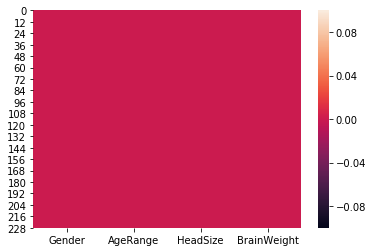

In [12]:
sns.heatmap(data.isnull())

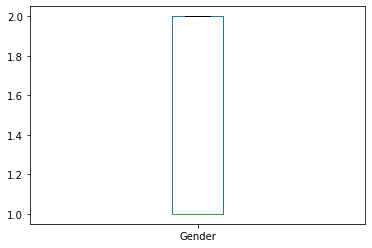

In [13]:
data["Gender"].plot.box()

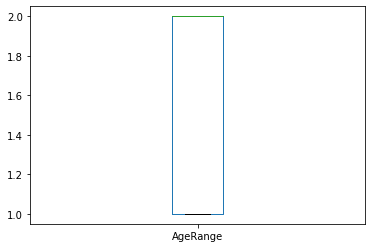

In [14]:
data["AgeRange"].plot.box()

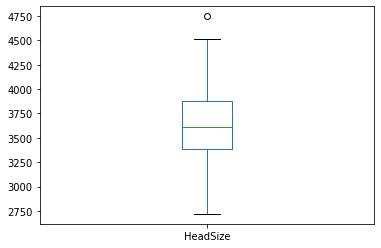

In [15]:
data["HeadSize"].plot.box()

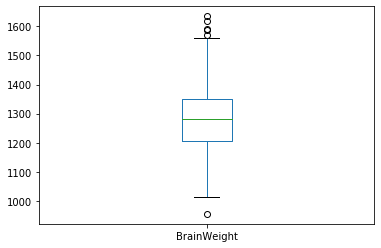

In [16]:
data["BrainWeight"].plot.box()

# REMOVING OUTLIERS USING ZSCORE

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [18]:
threshold=1
print(np.where(z>1))

(array([  0,   0,   0,   1,   2,   2,   3,   4,   4,   4,   5,   6,   7,
         8,   9,  10,  11,  12,  13,  13,  13,  14,  15,  15,  16,  17,
        18,  18,  19,  19,  20,  21,  21,  22,  23,  24,  24,  24,  25,
        25,  25,  26,  26,  26,  27,  27,  27,  28,  29,  29,  29,  30,
        31,  31,  32,  32,  33,  33,  33,  34,  34,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  42,  42,  43,  43,  44,  45,  45,  45,
        46,  46,  46,  47,  47,  48,  49,  50,  51,  52,  52,  53,  53,
        54,  54,  55,  56,  57,  57,  60,  62,  63,  63,  64,  65,  67,
        68,  68,  69,  69,  70,  70,  72,  73,  73,  81,  82,  85,  86,
        89,  90,  97, 101, 102, 106, 106, 109, 109, 118, 121, 122, 122,
       124, 126, 127, 128, 132, 132, 134, 134, 134, 134, 135, 135, 136,
       136, 137, 137, 138, 138, 138, 138, 139, 139, 139, 139, 140, 140,
       141, 141, 142, 142, 142, 143, 143, 144, 144, 145, 145, 146, 146,
       146, 147, 147, 147, 148, 148, 149, 149, 149, 150, 150, 1

In [19]:
z[0][1]

1.0744977685158095

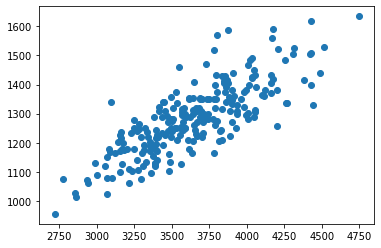

In [20]:
plt.scatter(data['HeadSize'],data['BrainWeight'])

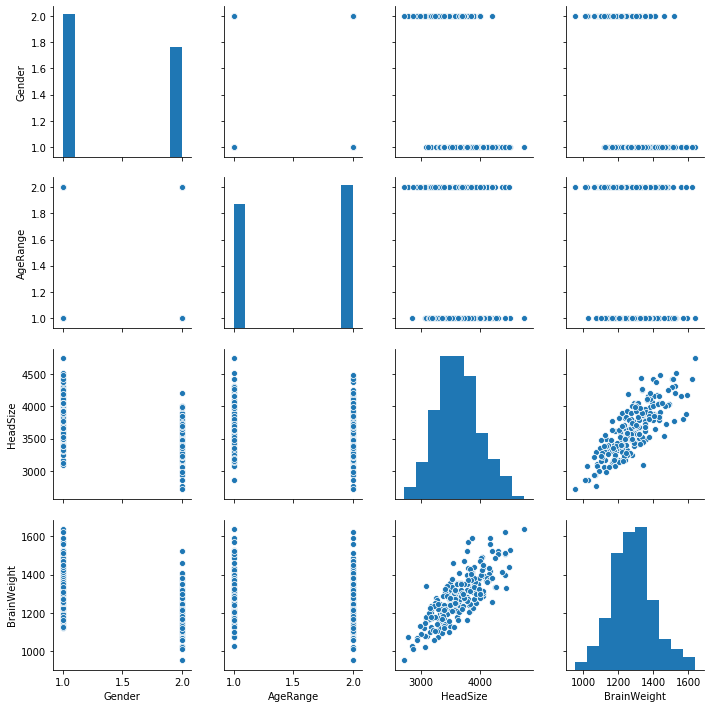

In [21]:
sns.pairplot(data)

In [22]:
data_new=data[(z<3).all(axis=1)]

In [23]:
data_new

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [24]:
data.shape

(237, 4)

In [25]:
data_new.shape

(236, 4)

In [26]:
data=data_new
data

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


# SPLITTING DATA INTO X AND Y

In [27]:
x=data.iloc[:,0:-1]
x.head()

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [28]:
y=data.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [29]:
x.shape

(236, 3)

In [30]:
y.shape

(236,)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=43)

In [32]:
x_train.shape

(186, 3)

In [33]:
y_train.shape

(186,)

In [34]:
x_test.shape

(50, 3)

In [35]:
y_test.shape

(50,)

# APPLYING MODEL

In [36]:
lm=LinearRegression()

In [37]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
lm.coef_

array([-30.11243037, -25.39958399,   0.24190872])

In [39]:
lm.intercept_

485.5622746107143

In [40]:
lm.score(x_train,y_train)

0.6159148534887593

In [41]:
#predict the value
pred=lm.predict(x_test)
print("Predicted result",pred)
print("Actual result",y_test)

Predicted result [1367.68846246 1290.27850347 1346.1585863  1253.87561465 1155.41959695
 1332.37062091 1268.50588689 1264.03578093 1220.36688313 1194.36690102
 1236.57393573 1271.16771452 1262.94198631 1091.07104549 1362.49263033
 1355.3519494  1197.51171439 1460.82332    1521.54240895 1298.50339999
 1490.33701566 1274.79551363 1193.15652571 1279.27686205 1332.12871219
 1348.09468777 1476.30630985 1371.07518455 1114.2951144  1219.52540799
 1395.9917828  1159.77395393 1270.32623938 1217.94779593 1300.80590651
 1147.43577746 1278.06731845 1234.7648257  1198.72042629 1388.49261245
 1356.561493   1266.57061712 1203.80050942 1141.38889114 1266.45569984
 1231.62001233 1292.33910127 1067.36482254 1401.55651509 1085.50797661]
Actual result 15     1405
103    1320
30     1318
141    1252
201    1235
79     1315
17     1292
140    1270
67     1154
219    1130
38     1236
129    1300
10     1340
134    1027
178    1324
78     1252
206    1220
2      1335
0      1530
110    1310
122    1440
39    

In [42]:
print("error")
print(mean_squared_error(y_test,pred))

error
2732.2102569303515


In [43]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.75562062781253


In [44]:
data.corr()

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.093023,-0.513779,-0.463639
AgeRange,-0.093023,1.000000,-0.093618,-0.159401
HeadSize,-0.513779,-0.093618,1.000000,0.791692
BrainWeight,-0.463639,-0.159401,0.791692,1.000000
